In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

In [3]:
train = pd.read_csv("./data/train.csv")  
test = pd.read_csv("./data/test.csv")

In [34]:
train.columns.values

array(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z',
       'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y',
       'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y',
       'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1',
       'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3',
       'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3',
       'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y',
       'tBodyAcc-correlation()-

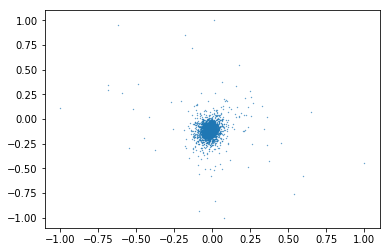

In [4]:
x_and_y=train.iloc[:,1:3]
plt.scatter(x_and_y['tBodyAcc-mean()-Y'], x_and_y['tBodyAcc-mean()-Z'], s=0.1)

In [5]:
subj1=train.loc[train.subject==1]

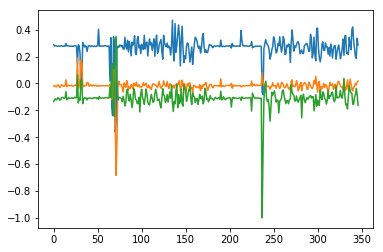

In [6]:
plt.plot(subj1["tBodyAcc-mean()-X"])
plt.plot(subj1["tBodyAcc-mean()-Y"])
plt.plot(subj1["tBodyAcc-mean()-Z"])
plt.show()

## K Nearest Neighbors

In [17]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
# lasso_model = linear_model.Lasso.path()
# print(train.drop('Activity',1))
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(train.drop('Activity',1),train.Activity)
                                 
# KNeighborsClassifier(train.drop('Activity',1), sk.preprocessing.LabelEncoder(train.Activity))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

2
5
10
15
25
50
75
100


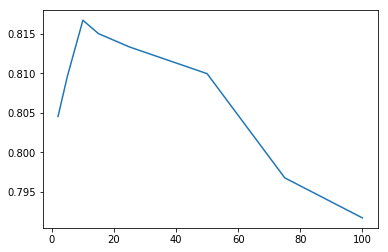

In [36]:
all_correct_values = [2, 5, 10, 15, 25, 50, 75, 100]
all_correct_rates = []
for i in all_correct_values:
    print(i)
    classifier_i = KNeighborsClassifier(n_neighbors=i)
    classifier_i.fit(train.drop('Activity',1),train.Activity)
    predicted=classifier_i.predict(test.drop('Activity', 1))
    correct=predicted==test.Activity
    all_correct_rates.append(sum(correct)/len(correct))
plt.plot(all_correct_values, all_correct_rates)


In [16]:
predicted=classifier.predict(test.drop('Activity',1))


In [24]:
correct=predicted==test.Activity
sum(correct)/len(correct)

0.8096369189005769

In [25]:
len(test.Activity)

2947

## Performing LDA

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [10]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(train.drop('Activity',1), train.Activity)

/home/matt/Documents/data-science/Data-Science-Final/env/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [13]:
predicted=lda.predict(test.drop('Activity',1))
correct=predicted==test.Activity
sum(correct)/len(correct)

0.9643705463182898

In [33]:
predicted_train = lda.predict(train.drop('Activity', 1))
transform_points = lda.fit_transform(train.drop('Activity', 1), train.Activity)
transform_data = pd.DataFrame(transform_points)
transform_data.columns = ['Component1', 'Component2']
transform_data['class'] = np.asarray(predicted_train)


/home/matt/Documents/data-science/Data-Science-Final/env/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [7]:
sns.lmplot( x="Component1", y="Component2", data=transform_data, fit_reg=False, hue='class', legend=True, markers=["o", "x", ".", "^", "*", "p"], scatter_kws={'s': 10})


NameError: name 'transform_data' is not defined

## Plotting LDA Boundaries?

In [ ]:
def plot_lda_boundaries(lda, X, Y):
    

## Using the first three variables to perform kNN

In [27]:
acc_vars = train.iloc[:,0:3]

In [28]:
classifier=KNeighborsClassifier(n_neighbors=100)
classifier.fit(acc_vars, train.Activity)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [29]:
test_vars = test.iloc[:,0:3]

predicted=classifier.predict(test_vars)

In [30]:
correct=predicted==test.Activity
sum(correct)/len(correct)

0.4770953512046149

## Using just mean accel data to perform LDA

In [37]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(acc_vars, train.Activity)

LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [38]:
predicted=lda.predict(test.iloc[:,0:3])
correct=predicted==test.Activity
sum(correct)/len(correct)

0.21954530030539532

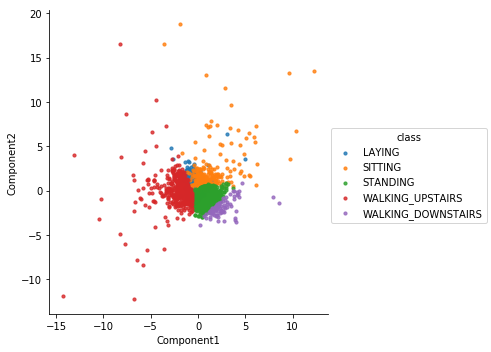

In [41]:
predicted_train = lda.predict(acc_vars)
transform_points = lda.fit_transform(acc_vars, train.Activity)
transform_data = pd.DataFrame(transform_points)
transform_data.columns = ['Component1', 'Component2']
transform_data['class'] = np.asarray(predicted_train)
sns.lmplot( x="Component1", y="Component2", data=transform_data, fit_reg=False, hue='class', legend=True, scatter_kws={'s': 10})
